This is described by an equation of the form
$$
\frac1{t^2} \frac{d}{dt}\left(t^2 \frac{d\theta}{dt}\right) + \theta^n = 0
$$

In [1]:
from integrators import contact as ic
from integrators.common import rk4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fast') #alt: 'seaborn-white'

#plt.rcParams.update({'font.size': 20, 'font.family': 'serif', 'font.weight':'normal'})
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['mathtext.fontset'] = "cm"

In [3]:
class LaneEmden:
    def __init__(self, n):
        self.n = n

    def f(self, t):
        return 2/t
    
    def V(self, q, t):
        return q**(self.n+1)/(self.n+1)
    
    def Vq(self, q, t):
        return q**self.n

In [4]:
def upper_error_bound(n, m, dt, p, q):
    return 0 if m==0 else np.abs(
        dt * p * (1 + 59/(2160*m**6) - 1/(72*m**4))
        + dt**2 * q**n/3 * (1/(240*m**5) + 1/(12*m**3) - 1/m)
        + dt**3 * n * p * q**(n-1)/6 * (1 + 1/(120*m**4))
    )
        
def upper_error_bound_p(n, m, dt, p, q):
    return 0 if m==0 else np.abs(
        p * (31/(672*m**7) - 7/(120*m**5) + 1/(6*m**3) - 2/m) +
        + dt * q**n * (38 - 75 * m**2 + 360 * m**4 - 1080 * m**6)/(1080* m**6)
        + dt**2 * n * p * q**(n-1) * (-1 - 20 * m**2 + 240 * m**4)/(720 * m**5)
        + dt**3 * n * q**(n-2) * ((35 - 168 * m**2 + 120 * m**4) * q**(1 + n)
                                  -(1 + 120 *m**4)*(n-1)*p**2
                                 )/(1440 * m**4))

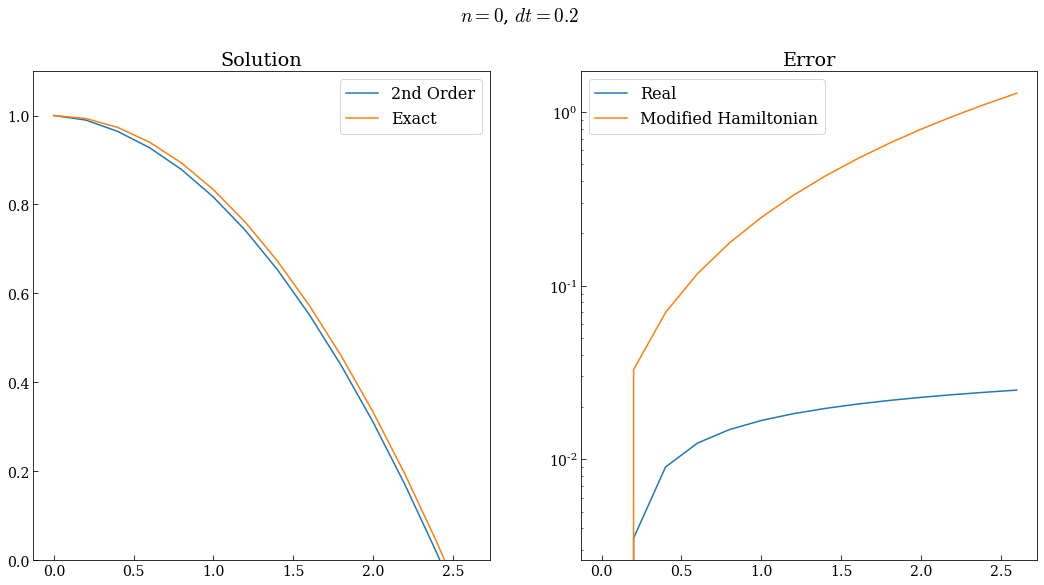

In [5]:
n = 0
le = LaneEmden(n)
dt = 0.2
tf = 2.7
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: 1-1/6*t**2
errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,9))
plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order")
plt.plot(tspan, exact(tspan),
         label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact(tspan)),label="Real")
plt.plot(tspan,np.cumsum([errq(m,p0,q0) for m, p0, q0 in zip(range(len(tspan)),sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


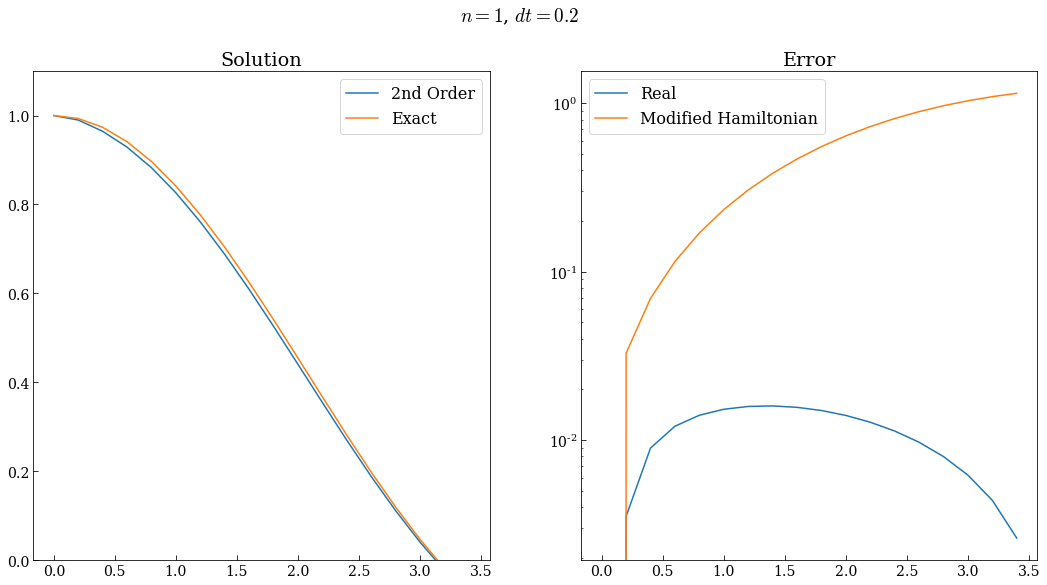

In [6]:
n = 1
le = LaneEmden(n)
dt = 0.2
tf = 3.5
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: np.sin(t)/t
# Deal with limit t->0 by hand
exact = exact(tspan)
exact[0] = 1.0

errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,9))
plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order")
plt.plot(tspan, exact,
         label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact),label="Real")
plt.plot(tspan,np.cumsum([errq(m,p0,q0) for m, p0, q0 in zip(range(len(tspan)),sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()

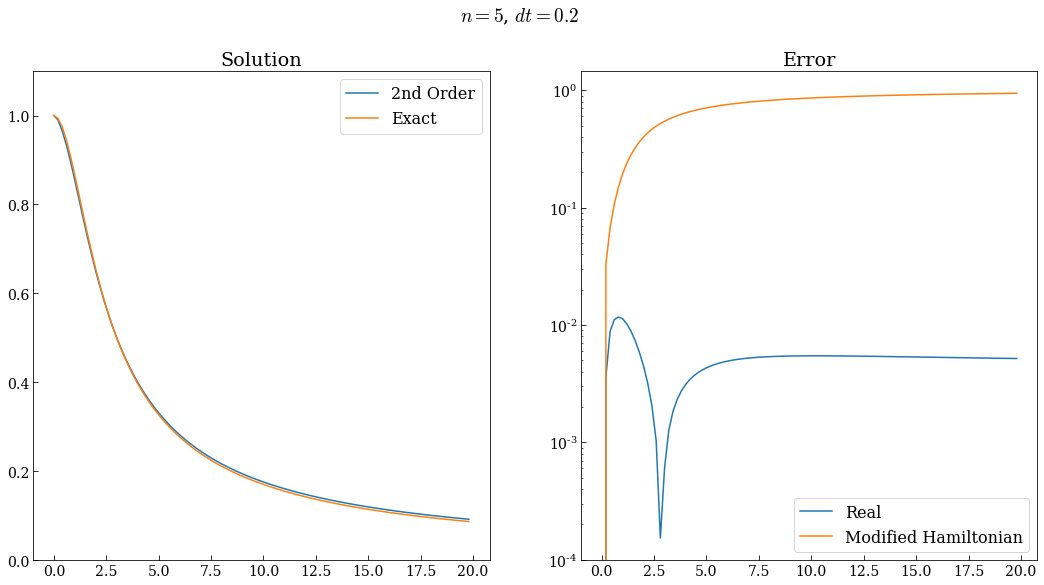

In [7]:
n=5
le = LaneEmden(n)
dt = 0.2
tf = 20.0
p0, q0 = (0,1)
tspan = np.arange(0.0, tf, dt)

exact = lambda t: 1/np.sqrt(1 + t**2/3)
errq = lambda m, p0, q0: upper_error_bound(n,m,dt,p0,q0)
errp = lambda m, p0, q0: upper_error_bound_p(n,m,dt,p0,q0)

plt.figure(figsize=(18,9))
plt.suptitle(f"$n={le.n}$, $dt={dt}$")
sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)

#p1, q1 = sol[:,0][1], sol[:,1][1]
#solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
#sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

plt.subplot(121)
plt.title("Solution")
plt.plot(tspan,sol[:,1],label="2nd Order")
plt.plot(tspan, exact(tspan),
         label="Exact")
plt.ylim(0,1.1)
plt.legend()
    
plt.subplot(122)
plt.title("Error")
plt.plot(tspan,abs(sol[:,1]-exact(tspan)),label="Real")
plt.plot(tspan,np.cumsum([errq(m,p0,q0) for m, p0, q0 in zip(range(len(tspan)),sol[:,0],sol[:,1])]),
         label="Modified Hamiltonian")
plt.legend()
plt.yscale("log")
plt.legend()

plt.show()